#  Supervised Learning - Military Base Impact

# 1. Install & Import required libraries 

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.arima.model import ARIMA

# 2. Data Exploration & Analysis

In [56]:
# below "military_data.xlsx" file (attached with mail), which is a cleaned version of: "OLDCC_Spending_by_State_FY2022_Online_Data_October2023.xlsx" 
military_data = "military_data.xlsx"

In [57]:
# Read the relevant sheets
personnel_df = pd.read_excel(military_data, sheet_name="7.DoD Personnel Nbrs, by Cnty")
payroll_df = pd.read_excel(military_data, sheet_name="11.DoD Prnl Spending, by Cnty")
contracts_df = pd.read_excel(military_data, sheet_name="2.Contract Spending by Cnty")

In [58]:
# Rename columns for consistency
personnel_df.columns = ["State", "County", "Active Duty 2022", "Civilian 2022", "National Guard 2022", "Reserve 2022", "Total Personnel 2022"]
payroll_df.columns = ["State", "County", "Payroll FY2022"]
contracts_df.columns = ["State", "County", "Contract Spending FY2022"]

In [59]:
# Convert all names to lowercase and remove spaces for accurate merging
for df in [personnel_df, payroll_df, contracts_df]:
    df["State"] = df["State"].str.lower().str.strip()
    df["County"] = df["County"].str.lower().str.strip()

In [60]:
# Merge datasets on State and County
merged_df = personnel_df.merge(payroll_df, on=["State", "County"], how="inner")
merged_df = merged_df.merge(contracts_df, on=["State", "County"], how="inner")

# Save the merged dataset to CSV
merged_df.to_csv("merged_military_data.csv", index=False)

In [61]:
# Display the first few rows to verify
merged_df.head()

,State,County,Active Duty 2022,Civilian 2022,National Guard 2022,Reserve 2022,Total Personnel 2022,Payroll FY2022,Contract Spending FY2022
0,alabama,madison,683,13856,415,684,15638,1.688429e+09,7.345960e+09
1,alabama,montgomery,2646,3145,2740,2055,10586,6.446412e+08,4.836929e+08
2,alabama,dale,3314,2220,28,155,5717,4.378770e+08,8.839518e+08
3,alabama,calhoun,42,3024,947,308,4321,2.267529e+08,2.495945e+08
4,alabama,jefferson,267,355,1942,1582,4146,1.634426e+08,5.933917e+07


# Chart 1: Bar Chart - Top 5 Counties by Contract Spending

C:\Users\jackp\AppData\Local\Temp\ipykernel_8036\792791294.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"${int(y/1e9)}B" for y in ax.get_yticks()])


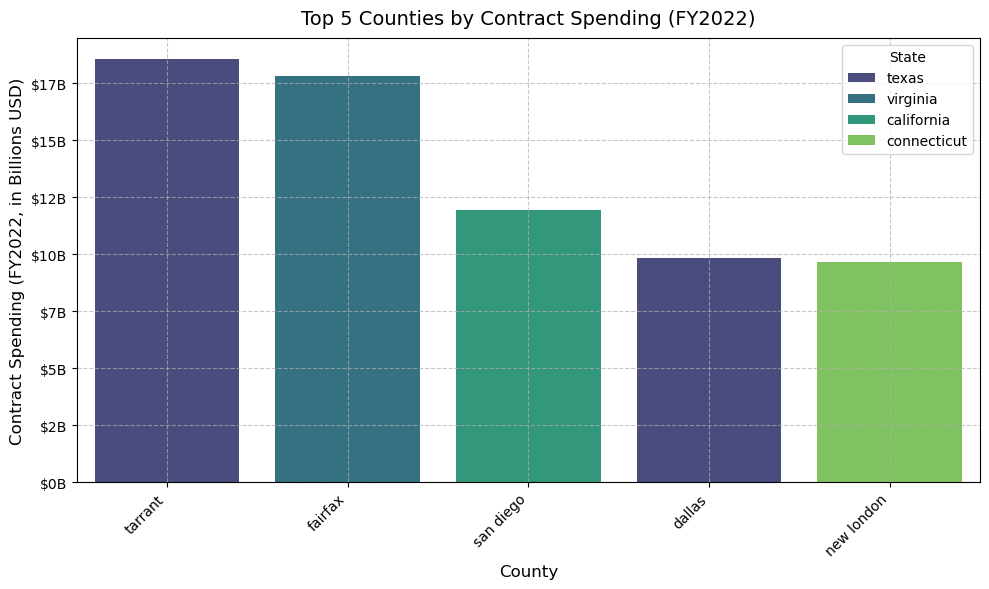

In [62]:
top_contracts = merged_df.nlargest(5, "Contract Spending FY2022")
plt.figure(figsize=(10, 6))
sns.barplot(x="County", y="Contract Spending FY2022", hue="State", data=top_contracts, palette="viridis")
plt.title("Top 5 Counties by Contract Spending (FY2022)", fontsize=14, pad=10)
plt.xlabel("County", fontsize=12)
plt.ylabel("Contract Spending (FY2022, in Billions USD)", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')  # Avoid scientific notation
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--', alpha=0.7)

# Convert y-axis to billions for readability
ax = plt.gca()
ax.set_yticklabels([f"${int(y/1e9)}B" for y in ax.get_yticks()])
plt.tight_layout()
plt.show()

### This bar chart represents the Top 5 Counties by Contract Spending (FY2022) in the U.S.

### Key Insights:

#### Tarrant (Texas) and Fairfax (Virginia) lead with over $17 billion in contract spending.
#### San Diego (California) follows at a slightly lower level.
#### Dallas (Texas) and New London (Connecticut) also feature in the top 5 but with lower spending compared to the top two counties.

## Load all the unemployment files  : 2009_census_data.csv, 2010_census_data.csv, 2011_census_data.csv, etc.


# preparing all census_data.csv

In [63]:
import pandas as pd

# Define years and file pattern
years = range(2009, 2023)
file_pattern = "{}_census_data.csv"

# List to store processed DataFrames
df_list = []

for year in years:
    file_name = file_pattern.format(year)

    try:
        # Read CSV file
        census_data = pd.read_csv(file_name)

        # Remove 'County' from county_name
        census_data['county_name'] = census_data['county_name'].str.rsplit(' ', n=1).str[0]

        # Save modified file back
        census_data.to_csv(file_name, index=False)
        print(f"Changes saved to: {file_name}")

        # Add 'Year' column and store in list
        census_data['Year'] = year
        df_list.append(census_data)

    except FileNotFoundError:
        print(f"Warning: Could not find {file_name}")
    except Exception as e:
        print(f"Error processing {file_name}: {str(e)}")

# Merge all DataFrames if data exists
if df_list:
    census_data = pd.concat(df_list, ignore_index=True)
    
    # Save merged data
    census_data.to_csv("all_census_data.csv", index=False)
else:
    print("No valid files found. Merging skipped.")


Changes saved to: 2009_census_data.csv
Changes saved to: 2010_census_data.csv
Changes saved to: 2011_census_data.csv
Changes saved to: 2012_census_data.csv
Changes saved to: 2013_census_data.csv
Changes saved to: 2014_census_data.csv
Changes saved to: 2015_census_data.csv
Changes saved to: 2016_census_data.csv
Changes saved to: 2017_census_data.csv
Changes saved to: 2018_census_data.csv
Changes saved to: 2019_census_data.csv
Changes saved to: 2020_census_data.csv
Changes saved to: 2021_census_data.csv
Changes saved to: 2022_census_data.csv


In [64]:
# In This File 2009_census_data.csv We Have NULL Data 

In [65]:
census_data[census_data["Year"]==2009]

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,county,county_name,state_name,Year
0,16.0,(X),50181.0,87.0,498.0,3.8,(X),145300.0,"Jefferson County, Idaho",16,51,Jefferson,Idaho,2009
1,13.0,(X),40322.0,47.0,663.0,4.7,(X),130600.0,"Jerome County, Idaho",16,53,Jerome,Idaho,2009
2,12.0,(X),45446.0,1072.0,6212.0,3.5,(X),213000.0,"Kootenai County, Idaho",16,55,Kootenai,Idaho,2009
3,29.0,(X),36448.0,196.0,1050.0,5.4,(X),173200.0,"Latah County, Idaho",16,57,Latah,Idaho,2009
4,0.0,(X),38750.0,69.0,1136.0,8.5,(X),171400.0,"Lemhi County, Idaho",16,59,Lemhi,Idaho,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,0.0,(X),14088.0,0.0,446.0,2.3,(X),82600.0,"Las Marías Municipio, Puerto Rico",72,83,Las,Puerto Rico,2009
3217,0.0,(X),14771.0,5.0,1108.0,6.7,(X),71400.0,"Peñuelas Municipio, Puerto Rico",72,111,Peñuelas,Puerto Rico,2009
3218,0.0,(X),19156.0,0.0,2155.0,1.7,(X),98000.0,"Loíza Municipio, Puerto Rico",72,87,Loíza,Puerto Rico,2009
3219,39.0,(X),17298.0,46.0,896.0,3.6,(X),114700.0,"Cataño Municipio, Puerto Rico",72,33,Cataño,Puerto Rico,2009


In [66]:
census_data = census_data.dropna(subset=["unemployment %", "% below poverty line"])

In [67]:
census_data = census_data[(census_data["unemployment %"] != "(X)") & (census_data["% below poverty line"] != "(X)")]

In [68]:
census_data.head()

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,county,county_name,state_name,Year
3221,13.0,10.1,19689.0,12927.0,1092.0,3.9,54.3,81300.0,"Comerío Municipio, Puerto Rico",72,45,Comerío,Puerto Rico,2010
3222,38.0,33.6,17253.0,11870.0,2440.0,5.2,59.0,74900.0,"Guánica Municipio, Puerto Rico",72,55,Guánica,Puerto Rico,2010
3223,143.0,6.5,51519.0,34253.0,8713.0,14.2,16.6,161400.0,"Clarke County, Georgia",13,59,Clarke,Georgia,2010
3224,0.0,20.5,33712.0,26250.0,802.0,16.9,25.5,58500.0,"Clay County, Georgia",13,61,Clay,Georgia,2010
3225,759.0,13.1,52802.0,43311.0,17653.0,17.2,13.6,127800.0,"Clayton County, Georgia",13,63,Clayton,Georgia,2010


In [18]:
# Convert relevant columns to numeric, just in case
census_data["unemployment %"] = pd.to_numeric(census_data["unemployment %"], errors="coerce")
census_data["% below poverty line"] = pd.to_numeric(census_data["% below poverty line"], errors="coerce")

In [21]:
print("Unique unemployment % values:", census_data["unemployment %"].unique())
print("Any negative values?", (census_data["unemployment %"] < 0).any())
print("Number of rows after cleaning:", len(census_data))
print("Unique states:", census_data["state_name"].unique())

Unique unemployment % values: [ 1.01000000e+01  3.36000000e+01  6.50000000e+00  2.05000000e+01
  1.31000000e+01  3.70000000e+00  7.20000000e+00  8.10000000e+00
  8.40000000e+00  6.30000000e+00  1.15000000e+01  6.60000000e+00
  6.90000000e+00  1.05000000e+01  9.00000000e+00  7.90000000e+00
  6.20000000e+00  7.40000000e+00  8.90000000e+00  1.06000000e+01
  7.60000000e+00  1.02000000e+01  1.00000000e+01  9.30000000e+00
  5.60000000e+00  8.60000000e+00  6.10000000e+00  6.40000000e+00
  8.80000000e+00  8.30000000e+00  8.50000000e+00  1.14000000e+01
  1.24000000e+01  1.09000000e+01  1.46000000e+01  7.10000000e+00
  8.70000000e+00  4.70000000e+00  9.00000000e-01  4.80000000e+00
  2.00000000e+00  2.60000000e+00  6.80000000e+00  1.22000000e+01
  1.10000000e+01  1.33000000e+01  8.20000000e+00  1.13000000e+01
  9.80000000e+00  7.50000000e+00  1.20000000e+01  1.17000000e+01
  1.44000000e+01  2.30000000e+01  9.20000000e+00  6.70000000e+00
  9.50000000e+00  1.77000000e+01  1.16000000e+01  8.00000000

In [22]:
census_data = census_data[census_data["unemployment %"] >= 0]

In [23]:
print("Rows after filtering negatives:", len(census_data))
print("Min unemployment %:", census_data["unemployment %"].min())
print("Max unemployment %:", census_data["unemployment %"].max())
print("Unique states:", len(census_data["state_name"].unique()))

Rows after filtering negatives: 41867
Min unemployment %: 0.0
Max unemployment %: 40.9
Unique states: 52


In [24]:
avg_unemployment = census_data.groupby("state_name")["unemployment %"].mean().reset_index()

# Chart 2: Bar Chart - Average Unemployment % by State

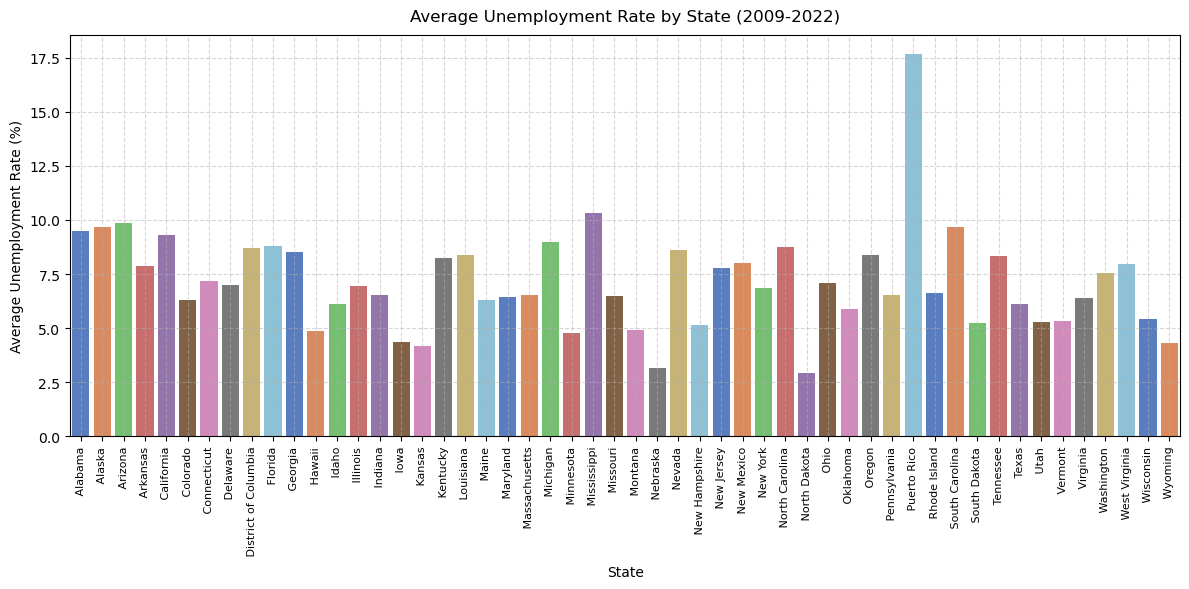

In [26]:
plt.figure(figsize=(12, 6))  # Wider figure to fit 52 states
sns.barplot(x="state_name", y="unemployment %", data=avg_unemployment, hue="state_name", palette="muted", legend=False)
plt.title("Average Unemployment Rate by State (2009-2022)", fontsize=12, pad=10)
plt.xlabel("State", fontsize=10)
plt.ylabel("Average Unemployment Rate (%)", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=90, ha="center", fontsize=8)  # Rotate and shrink for readability
plt.ylim(0, None)  # Start y-axis at 0
plt.tight_layout()
plt.show()

### This bar chart represents the average unemployment rate by state (2009-2022).

#### Observations:
#### Puerto Rico has the highest unemployment rate, significantly above other states.
#### North Dakota and Nebraska seem to have the lowest unemployment rates.
#### Most states have an unemployment rate between 5% and 10%, with some outliers.

In [69]:
# # Get all CSV file names from 2009 to 2022
# csv_files = [f"{year}_census_data.csv" for year in range(2010, 2023)]

# # Read and concatenate all files
# df_list = [pd.read_csv(file) for file in csv_files]
# all_data = pd.concat(df_list, ignore_index=True)

# # Save the merged data
# all_data.to_csv("all_census_data.csv", index=False)

# # Read the merged file
# census_data = pd.read_csv("all_census_data.csv")
military_data = pd.read_csv('merged_military_data.csv')
# # Display first few rows
# print(census_data.head())

In [70]:
# Make sure the 'county' columns in both datasets have matching formats
census_data['county_name'] = census_data['county_name'].str.lower().str.strip()
military_data['County'] = military_data['County'].str.lower().str.strip()

In [71]:
# Merge the datasets on the 'county' column
merged_data = pd.merge(census_data, military_data, left_on='county_name', right_on='County', how='inner')

In [72]:
# Display the merged dataset
merged_data.head()

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,...,Year,State,County,Active Duty 2022,Civilian 2022,National Guard 2022,Reserve 2022,Total Personnel 2022,Payroll FY2022,Contract Spending FY2022
0,1171.0,7.2,85962.0,65522.0,26457.0,11.7,7.6,211000.0,"Cobb County, Georgia",13,...,2010,georgia,cobb,284,1242,2869,3211,7606,3.186758e+08,1.564458e+09
1,60.0,8.1,46521.0,35202.0,2457.0,12.0,18.3,77700.0,"Coffee County, Georgia",13,...,2010,tennessee,coffee,49,474,237,11,771,5.409079e+07,5.765458e+08
2,30.0,11.5,42245.0,31390.0,774.0,9.4,21.3,80000.0,"Cook County, Georgia",13,...,2010,illinois,cook,329,737,2330,1799,5195,1.789739e+08,3.601833e+09
3,184.0,10.6,68004.0,55852.0,5529.0,9.3,8.8,157300.0,"Douglas County, Georgia",13,...,2010,kansas,douglas,42,24,105,67,238,8.019181e+06,3.866629e+06
4,184.0,10.6,68004.0,55852.0,5529.0,9.3,8.8,157300.0,"Douglas County, Georgia",13,...,2010,nebraska,douglas,85,897,240,541,1763,1.037908e+08,3.947827e+07


# Data cleaning : Need to handle the NaN and ND values

In [73]:
# Convert 'ND' to NaN for consistency
merged_data.replace('ND', np.nan, inplace=True)

In [74]:
military_data = pd.read_csv('merged_military_data.csv')
# military_data.head()

In [76]:
numeric_columns = [
    'unemployment %', 'mean income', 'median income', 'vacant housing units',
    'rental vacany rate', '% below poverty line', 'median house value',
    'Active Duty 2022', 'Civilian 2022', 'National Guard 2022', 'Reserve 2022',
    'Total Personnel 2022', 'Payroll FY2022', 'Contract Spending FY2022'
]

# Step 1: Convert all numeric columns to float, coercing errors to NaN
for col in numeric_columns:
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Step 2: Handle NaN values - Option 1: Drop rows (uncomment if preferred)
# merged_data_cleaned = merged_data.dropna()

# Step 3: Handle NaN values - Option 2: Impute with mean or median
merged_data = merged_data.fillna({
    'unemployment %': merged_data['unemployment %'].mean(),
    'mean income': merged_data['mean income'].median(),
    'median income': merged_data['median income'].median(),
    'vacant housing units': merged_data['vacant housing units'].median(),
    'rental vacany rate': merged_data['rental vacany rate'].mean(),
    '% below poverty line': merged_data['% below poverty line'].mean(),
    'median house value': merged_data['median house value'].median(),
    'Active Duty 2022': merged_data['Active Duty 2022'].median(),
    'Civilian 2022': merged_data['Civilian 2022'].median(),
    'National Guard 2022': merged_data['National Guard 2022'].median(),
    'Reserve 2022': merged_data['Reserve 2022'].median(),
    'Total Personnel 2022': merged_data['Total Personnel 2022'].median(),
    'Payroll FY2022': merged_data['Payroll FY2022'].median(),
    'Contract Spending FY2022': merged_data['Contract Spending FY2022'].median()
})

In [77]:
# Check again after handling missing values
print("Missing values after cleaning:\n", merged_data.isnull().sum())

# Store the cleaned merged data into the same file
merged_data.to_csv('merged_military_data.csv', index=False)

Missing values after cleaning:
 mil pop                     0
unemployment %              0
mean income                 0
median income               0
vacant housing units        0
rental vacany rate          0
% below poverty line        0
median house value          0
NAME                        0
state                       0
county                      0
county_name                 0
state_name                  0
Year                        0
State                       0
County                      0
Active Duty 2022            0
Civilian 2022               0
National Guard 2022         0
Reserve 2022                0
Total Personnel 2022        0
Payroll FY2022              0
Contract Spending FY2022    0
dtype: int64


In [78]:
merged_data.head()

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,...,Year,State,County,Active Duty 2022,Civilian 2022,National Guard 2022,Reserve 2022,Total Personnel 2022,Payroll FY2022,Contract Spending FY2022
0,1171.0,7.2,85962.0,65522.0,26457.0,11.7,7.6,211000.0,"Cobb County, Georgia",13,...,2010,georgia,cobb,284.0,1242.0,2869.0,3211.0,7606.0,3.186758e+08,1.564458e+09
1,60.0,8.1,46521.0,35202.0,2457.0,12.0,18.3,77700.0,"Coffee County, Georgia",13,...,2010,tennessee,coffee,49.0,474.0,237.0,11.0,771.0,5.409079e+07,5.765458e+08
2,30.0,11.5,42245.0,31390.0,774.0,9.4,21.3,80000.0,"Cook County, Georgia",13,...,2010,illinois,cook,329.0,737.0,2330.0,1799.0,5195.0,1.789739e+08,3.601833e+09
3,184.0,10.6,68004.0,55852.0,5529.0,9.3,8.8,157300.0,"Douglas County, Georgia",13,...,2010,kansas,douglas,42.0,24.0,105.0,67.0,238.0,8.019181e+06,3.866629e+06
4,184.0,10.6,68004.0,55852.0,5529.0,9.3,8.8,157300.0,"Douglas County, Georgia",13,...,2010,nebraska,douglas,85.0,897.0,240.0,541.0,1763.0,1.037908e+08,3.947827e+07


# 3. Supervised Learning Approach: 
1. Linear regression
2. Polynomial regression
3. Random forest regression

# Step 2: Regression Model (Economic Impact Analysis)

## 1. Linear regression :
Model training

#### NOTE: Selected most important/related features which are affecting unemployment rate and household income 

In [79]:
features = ['Total Personnel 2022', 'Active Duty 2022', 'National Guard 2022', 'Reserve 2022']

In [80]:
target_income = 'median income'  # Target variable: median income
target_unemployment = 'unemployment %'  # Target variable: unemployment rate

In [81]:
# Prepare the data for regression
X = merged_data[features]  # Independent variables (military deployment data)
y_income = merged_data[target_income]  # Dependent variable: median income
y_unemployment = merged_data[target_unemployment]  # Dependent variable: unemployment rate

In [82]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train_income, y_test_income = train_test_split(X, y_income, test_size=0.2, random_state=42)
X_train, X_test, y_train_unemployment, y_test_unemployment = train_test_split(X, y_unemployment, test_size=0.2, random_state=42)

In [83]:
# Train the model for predicting median household income
model_income = LinearRegression()
model_income.fit(X_train, y_train_income)

LinearRegression()

In [84]:
# Train the model for predicting unemployment rate
model_unemployment = LinearRegression()
model_unemployment.fit(X_train, y_train_unemployment)

LinearRegression()

Model testing (Linear regression) 

In [85]:
# Testing median household income
def predict_median_income(model):
    # Take user input
    total_personnel = float(input("Enter Total Personnel 2022: "))
    active_duty = float(input("Enter Active Duty 2022: "))
    national_guard = float(input("Enter National Guard 2022: "))
    reserve = float(input("Enter Reserve 2022: "))

    # Create DataFrame with correct feature names
    input_data = pd.DataFrame([[total_personnel, active_duty, national_guard, reserve]],
                              columns=['Total Personnel 2022', 'Active Duty 2022', 'National Guard 2022', 'Reserve 2022'])

    # Predict median income
    predicted_income = model.predict(input_data)[0]

    print(f"\nPredicted Median Income: ${predicted_income:,.2f}")

# Call function with trained model
predict_median_income(model_income)


Enter Total Personnel 2022:  23000
Enter Active Duty 2022:  34000
Enter National Guard 2022:  45000
Enter Reserve 2022:  203900



Predicted Median Income: $117,862.48


In [86]:
# Testing unemployment rate
def predict_unemployment_rate(model):
    # Take user input
    total_personnel = float(input("Enter Total Personnel 2022: "))
    active_duty = float(input("Enter Active Duty 2022: "))
    national_guard = float(input("Enter National Guard 2022: "))
    reserve = float(input("Enter Reserve 2022: "))

    # Create DataFrame with correct feature names
    input_data = pd.DataFrame([[total_personnel, active_duty, national_guard, reserve]],
                              columns=['Total Personnel 2022', 'Active Duty 2022', 'National Guard 2022', 'Reserve 2022'])

    # Predict unemployment rate
    predicted_unemployment = model.predict(input_data)[0]

    print(f"\nPredicted Unemployment Rate: {predicted_unemployment:.2f}%")

# Call function with trained model
predict_unemployment_rate(model_unemployment)

Enter Total Personnel 2022:  23000
Enter Active Duty 2022:  34000
Enter National Guard 2022:  24309
Enter Reserve 2022:  25000



Predicted Unemployment Rate: 9.20%


In [87]:
y_pred_income = model_income.predict(X_test)
y_pred_unemployment = model_unemployment.predict(X_test)

In [88]:
# Evaluate the performance of the model for median income
mae_income = mean_absolute_error(y_test_income, y_pred_income)
rmse_income = np.sqrt(mean_squared_error(y_test_income, y_pred_income))
r2_income = r2_score(y_test_income, y_pred_income)

In [89]:
# Print the evaluation metrics
print(f'Mean Absolute Error (Income): {mae_income}')
print(f'Root Mean Squared Error (Income): {rmse_income}')
print(f'R-squared (Income): {r2_income}')


Mean Absolute Error (Income): 11248.93038994472
Root Mean Squared Error (Income): 14870.730824344228
R-squared (Income): 0.009411283818043237


In [91]:
#Evaluate the performance of the model for median income
mae_unemployment = mean_absolute_error(y_test_unemployment, y_pred_unemployment)
rmse_unemployment = np.sqrt(mean_squared_error(y_test_unemployment, y_pred_unemployment))
r2_unemployment = r2_score(y_test_unemployment, y_pred_unemployment)


In [92]:
# Print the evaluation metrics
print(f'Mean Absolute Error (unemployment): {mae_unemployment}')
print(f'Root Mean Squared Error (unemployment): {rmse_unemployment}')
print(f'R-squared (unemployment): {r2_unemployment}')


Mean Absolute Error (unemployment): 2.5119317865044812
Root Mean Squared Error (unemployment): 3.2524084528122783
R-squared (unemployment): 0.003041129779839613


# Chart 3 Actual vs Predicted Median Income

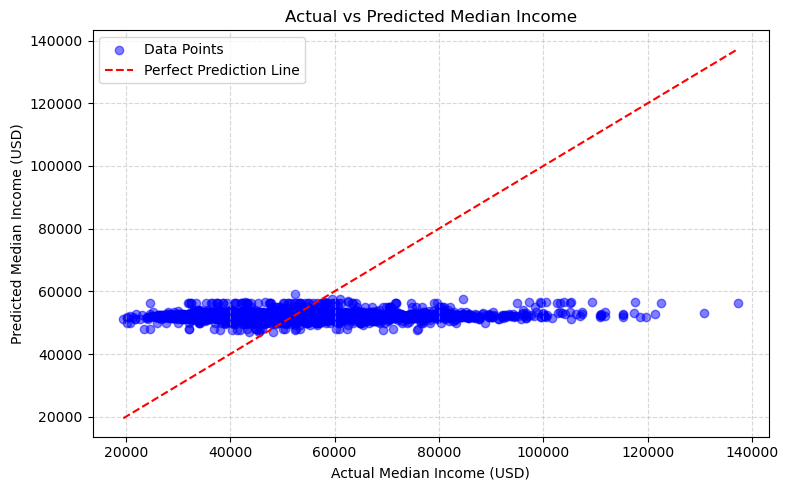

In [123]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_income, y_pred_income, color="blue", alpha=0.5, label="Data Points")
plt.plot([y_test_income.min(), y_test_income.max()], [y_test_income.min(), y_test_income.max()], 
         color="red", linestyle="--", label="Perfect Prediction Line")
plt.title("Actual vs Predicted Median Income", fontsize=12)
plt.xlabel("Actual Median Income (USD)", fontsize=10)
plt.ylabel("Predicted Median Income (USD)", fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Blue points representing data predictions.
#### Red dashed line as the ideal prediction line (perfect correlation).

### Observations:

#### The model seems to underpredict for higher actual values.
#### Predictions are clustered around a narrow range, indicating possible model bias.
#### Further refinement in feature selection or model complexity might be needed.

# Chart 4 Feature Coefficients for Unemployment Rate Prediction

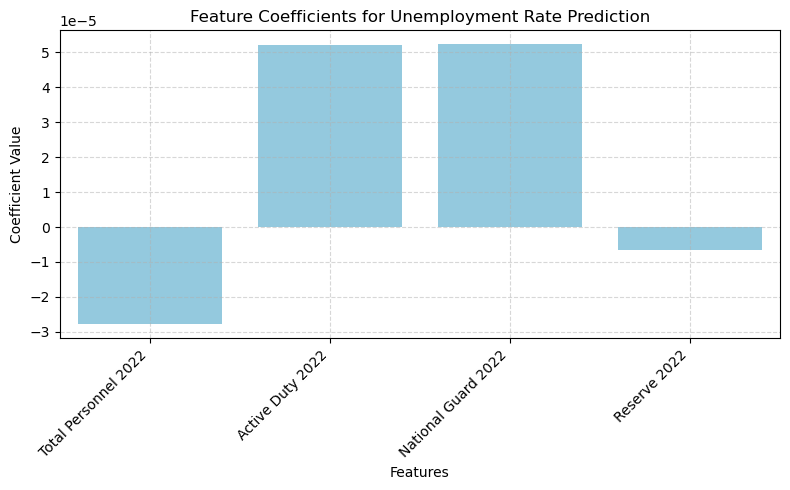

In [124]:
coeff_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model_unemployment.coef_
})
plt.figure(figsize=(8, 5))
sns.barplot(x="Feature", y="Coefficient", data=coeff_df, color="skyblue")
plt.title("Feature Coefficients for Unemployment Rate Prediction", fontsize=12)
plt.xlabel("Features", fontsize=10)
plt.ylabel("Coefficient Value", fontsize=10)
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 1. **Active Duty 2022 & National Guard 2022** have the highest positive influence on unemployment prediction.  
#### 2. **Total Personnel 2022** has a negative impact, suggesting higher personnel might reduce unemployment.

## 2. Polynomial regression :
Model training --> household income

In [93]:
# Apply PolynomialFeatures to the input data (e.g., degree=2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

In [94]:

# Train a polynomial regression model for median income prediction
model_poly_income = LinearRegression()
model_poly_income.fit(X_poly, y_income)


LinearRegression()

Model testing --> household income

In [95]:
# Step 1: Apply the polynomial transformation to the test data
X_test_poly = poly.transform(X_test)

# Step 2: Predict on the transformed test data
y_pred_poly_income = model_poly_income.predict(X_test_poly)


In [96]:
# Step 3: Evaluate the polynomial model for median income
mae_poly_income = mean_absolute_error(y_test_income, y_pred_poly_income)
rmse_poly_income = np.sqrt(mean_squared_error(y_test_income, y_pred_poly_income))
r2_poly_income = r2_score(y_test_income, y_pred_poly_income)

In [97]:

# Print the evaluation metrics
print(f'Mean Absolute Error (Polynomial Income): {mae_poly_income}')
print(f'Root Mean Squared Error (Polynomial Income): {rmse_poly_income}')
print(f'R-squared (Polynomial Income): {r2_poly_income}')


Mean Absolute Error (Polynomial Income): 11148.607308690755
Root Mean Squared Error (Polynomial Income): 14739.989710126212
R-squared (Polynomial Income): 0.026752913537608114


Model training --> unemployment rate

In [98]:
# Apply PolynomialFeatures (e.g., degree=2 for quadratic regression)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)  # Transform the input features

In [99]:
# Train a polynomial regression model for unemployment rate prediction
model_poly_unemployment = LinearRegression()
model_poly_unemployment.fit(X_poly, y_unemployment)  # Fit the model with unemployment rate

LinearRegression()

Model testing --> Unemployment rate

In [100]:
# Make predictions
y_pred_poly = model_poly_unemployment.predict(X_poly)

In [101]:
# Calculate performance metrics
mae = mean_absolute_error(y_unemployment, y_pred_poly)
rmse = np.sqrt(mean_squared_error(y_unemployment, y_pred_poly))
r2 = r2_score(y_unemployment, y_pred_poly)

# Print output in the required format
print(f"Mean Absolute Error (Polynomial Unemployment): {mae:.6f}")
print(f"Root Mean Squared Error (Polynomial Unemployment): {rmse:.6f}")
print(f"R-squared (Polynomial Unemployment): {r2:.16f}")

Mean Absolute Error (Polynomial Unemployment): 2.491660
Root Mean Squared Error (Polynomial Unemployment): 3.233057
R-squared (Polynomial Unemployment): 0.0099307122032450


In [102]:
# Compare the performance of Linear vs Polynomial regression
print(f'Linear Regression - MAE: {mae_income}, RMSE: {rmse_income}, R²: {r2_income}')
print(f'Polynomial Regression - MAE: {mae_poly_income}, RMSE: {rmse_poly_income}, R²: {r2_poly_income}')

Linear Regression - MAE: 11248.93038994472, RMSE: 14870.730824344228, R²: 0.009411283818043237
Polynomial Regression - MAE: 11148.607308690755, RMSE: 14739.989710126212, R²: 0.026752913537608114


# Chart 5: Scatter Plot - Actual vs Predicted Median Income (Polynomial)

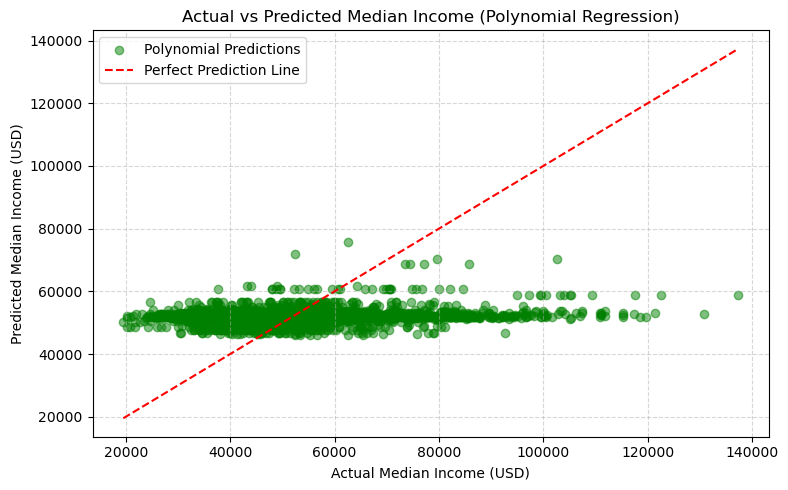

In [125]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_income, y_pred_poly_income, color="green", alpha=0.5, label="Polynomial Predictions")
plt.plot([y_test_income.min(), y_test_income.max()], [y_test_income.min(), y_test_income.max()], 
         color="red", linestyle="--", label="Perfect Prediction Line")
plt.title("Actual vs Predicted Median Income (Polynomial Regression)", fontsize=12)
plt.xlabel("Actual Median Income (USD)", fontsize=10)
plt.ylabel("Predicted Median Income (USD)", fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 1. Most predicted median incomes (green dots) are clustered around $50,000-$60,000, showing poor variability.  
#### 2. The predictions deviate significantly from the perfect prediction line (red), indicating a weak model fit.

# Chart 6: Bar Chart - R² Comparison (Linear vs Polynomial)

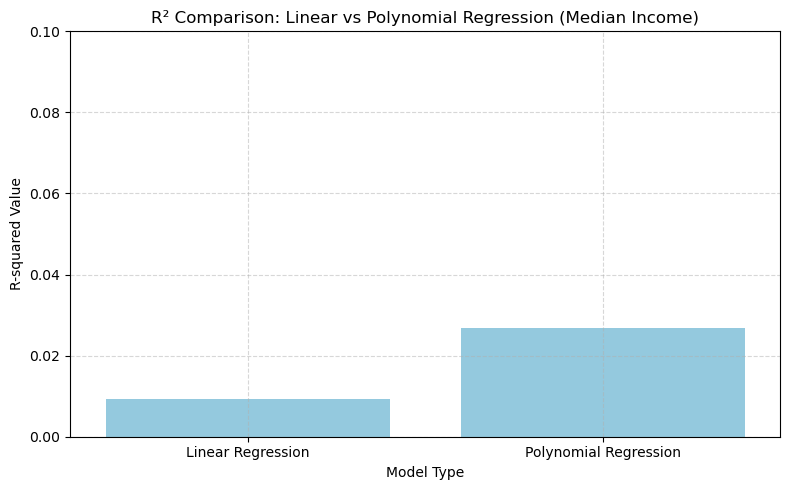

In [126]:
r2_data = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression"],
    "R-squared": [r2_score(y_test_income, y_pred_income), r2_score(y_test_income, y_pred_poly_income)]
})
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="R-squared", data=r2_data, color="skyblue")
plt.title("R² Comparison: Linear vs Polynomial Regression (Median Income)", fontsize=12)
plt.xlabel("Model Type", fontsize=10)
plt.ylabel("R-squared Value", fontsize=10)
plt.ylim(0, 0.1)  # Set limit to zoom in on small R² values
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### 1. Polynomial regression has a higher \( R^2 \) value than linear regression, indicating a better fit for median income data.  
#### 2. Both models have very low \( R^2 \) values, suggesting weak predictive power for this dataset.

# Step 3: Classification (Predict Military Residence)

In [103]:
merged_data["Total Personnel 2022"] = (
    merged_data["Total Personnel 2022"]
    .astype(str)  # Convert everything to string first
    .str.replace(r"[^\d]", "", regex=True)  # Remove non-numeric characters
    .astype(float)  # Convert to float (or .astype(int) if no decimals)
)


In [104]:
# merged_data["military_residence"] = (merged_data["Total Personnel 2022"] > 0).astype(int)
merged_data['military_residence'] = (merged_data['Total Personnel 2022'] > merged_data['Total Personnel 2022'].median()).astype(int)

In [105]:
# merged_data.to_csv("merged_military_data.csv")
# merged_data = pd.read_csv('merged_military_data.csv')

In [106]:
merged_data.head()

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,...,State,County,Active Duty 2022,Civilian 2022,National Guard 2022,Reserve 2022,Total Personnel 2022,Payroll FY2022,Contract Spending FY2022,military_residence
0,1171.0,7.2,85962.0,65522.0,26457.0,11.7,7.6,211000.0,"Cobb County, Georgia",13,...,georgia,cobb,284.0,1242.0,2869.0,3211.0,76060.0,3.186758e+08,1.564458e+09,1
1,60.0,8.1,46521.0,35202.0,2457.0,12.0,18.3,77700.0,"Coffee County, Georgia",13,...,tennessee,coffee,49.0,474.0,237.0,11.0,7710.0,5.409079e+07,5.765458e+08,0
2,30.0,11.5,42245.0,31390.0,774.0,9.4,21.3,80000.0,"Cook County, Georgia",13,...,illinois,cook,329.0,737.0,2330.0,1799.0,51950.0,1.789739e+08,3.601833e+09,1
3,184.0,10.6,68004.0,55852.0,5529.0,9.3,8.8,157300.0,"Douglas County, Georgia",13,...,kansas,douglas,42.0,24.0,105.0,67.0,2380.0,8.019181e+06,3.866629e+06,0
4,184.0,10.6,68004.0,55852.0,5529.0,9.3,8.8,157300.0,"Douglas County, Georgia",13,...,nebraska,douglas,85.0,897.0,240.0,541.0,17630.0,1.037908e+08,3.947827e+07,0


In [107]:
# Feature selection: Choose columns that are impacting military residence prediction
X = merged_data[['mil pop', 'Total Personnel 2022', 'Contract Spending FY2022', 
                 'mean income', 'median income', 'median house value', 
                 'unemployment %', '% below poverty line', 'vacant housing units', 
                 'rental vacany rate']]

In [108]:
# Assuming 'military_residence' is a column indicating 1 for "near military base" and 0 for "not"
y = merged_data['military_residence']

In [109]:
# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Standardize the features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [112]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [113]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2351
           1       1.00      0.92      0.96      1413

    accuracy                           0.97      3764
   macro avg       0.98      0.96      0.97      3764
weighted avg       0.97      0.97      0.97      3764

Confusion Matrix:
[[2350    1]
 [ 110 1303]]


In [114]:
# Define features and target variable
X = merged_data[['mil pop', 'Total Personnel 2022', 'Contract Spending FY2022', 
                 'mean income', 'median income', 'median house value', 
                 'unemployment %', '% below poverty line', 'vacant housing units', 
                 'rental vacany rate']]

y = merged_data['military_residence']  # Binary target: 0 = No, 1 = Yes

In [115]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
# Train Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [118]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [119]:
# Evaluate the models (on the test set)
log_reg_pred = log_reg_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

print("Logistic Regression Accuracy: ", accuracy_score(y_test, log_reg_pred))
print("Random Forest Accuracy: ", accuracy_score(y_test, rf_pred))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Logistic Regression Accuracy:  0.970510095642933
Random Forest Accuracy:  1.0
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2351
           1       1.00      0.92      0.96      1413

    accuracy                           0.97      3764
   macro avg       0.98      0.96      0.97      3764
weighted avg       0.97      0.97      0.97      3764

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2351
           1       1.00      1.00      1.00      1413

    accuracy                           1.00      3764
   macro avg       1.00      1.00      1.00      3764
weighted avg       1.00      1.00      1.00      3764



In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)  # Apply the same transformation to test data


In [121]:
# Function to predict based on dynamic user input
def predict_user_input():
    # Prompt the user for input
    print("Please enter the following details for prediction:")
    
    user_input = {}
    user_input['mil pop'] = float(input("Enter Military Population: "))
    user_input['Total Personnel 2022'] = float(input("Enter Total Personnel 2022: "))
    user_input['Contract Spending FY2022'] = float(input("Enter Contract Spending FY2022: "))
    user_input['mean income'] = float(input("Enter Mean Income: "))
    user_input['median income'] = float(input("Enter Median Income: "))
    user_input['median house value'] = float(input("Enter Median House Value: "))
    user_input['unemployment %'] = float(input("Enter Unemployment %: "))
    user_input['% below poverty line'] = float(input("Enter % Below Poverty Line: "))
    user_input['vacant housing units'] = float(input("Enter Vacant Housing Units: "))
    user_input['rental vacany rate'] = float(input("Enter Rental Vacancy Rate: "))
    
    # Ensure the input is in the correct format (convert to DataFrame)
    user_input_df = pd.DataFrame([user_input])
    
    # Scale the user input
    user_input_scaled = scaler.transform(user_input_df)
    
    # Make predictions with both models
    log_reg_prediction = log_reg_model.predict(user_input_scaled)
    rf_prediction = rf_model.predict(user_input_scaled)
    
    # Display results
    if log_reg_prediction == 1:
        print("Logistic Regression Prediction: Military Residence (Yes)")
    else:
        print("Logistic Regression Prediction: No Military Residence")
        
    if rf_prediction == 1:
        print("Random Forest Prediction: Military Residence (Yes)")
    else:
        print("Random Forest Prediction: No Military Residence")

# Call the function to take dynamic user input and make predictions
predict_user_input()

Please enter the following details for prediction:


Enter Military Population:  2300
Enter Total Personnel 2022:  23000
Enter Contract Spending FY2022:  230497
Enter Mean Income:  240
Enter Median Income:  240826
Enter Median House Value:  230000
Enter Unemployment %:  9.2
Enter % Below Poverty Line:  2.8
Enter Vacant Housing Units:  249
Enter Rental Vacancy Rate:  2.3


Logistic Regression Prediction: Military Residence (Yes)
Random Forest Prediction: No Military Residence


# Chart 7: Confusion Matrix Heatmap - Logistic Regression

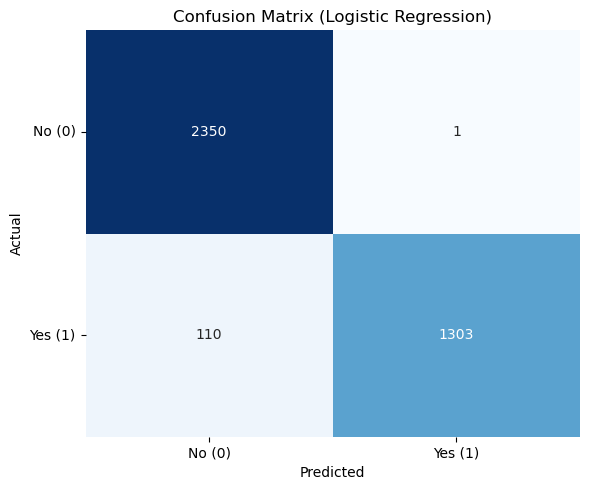

In [128]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Logistic Regression)", fontsize=12)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Actual", fontsize=10)
plt.xticks([0.5, 1.5], ["No (0)", "Yes (1)"])
plt.yticks([0.5, 1.5], ["No (0)", "Yes (1)"], rotation=0)
plt.tight_layout()
plt.show()

# Chart 8: Bar Chart - Feature Importance from Random Forest

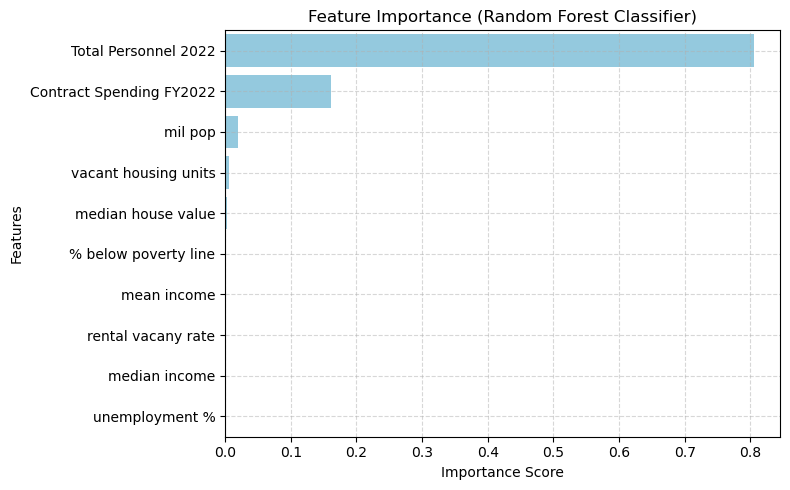

In [129]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feature_importance, color="skyblue")
plt.title("Feature Importance (Random Forest Classifier)", fontsize=12)
plt.xlabel("Importance Score", fontsize=10)
plt.ylabel("Features", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Step 4: Time-Series Forecasting (Economic Trends)

C:\Users\jackp\AppData\Local\Temp\ipykernel_8036\1317327990.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  time_series_data.index = pd.date_range(start='2015', periods=len(time_series_data), freq='Y')
C:\Users\jackp\AppData\Local\Temp\ipykernel_8036\1317327990.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(time_series_data.index[-1], periods=future_steps + 1, freq='Y')[1:], forecast, label="Forecast", linestyle='--')


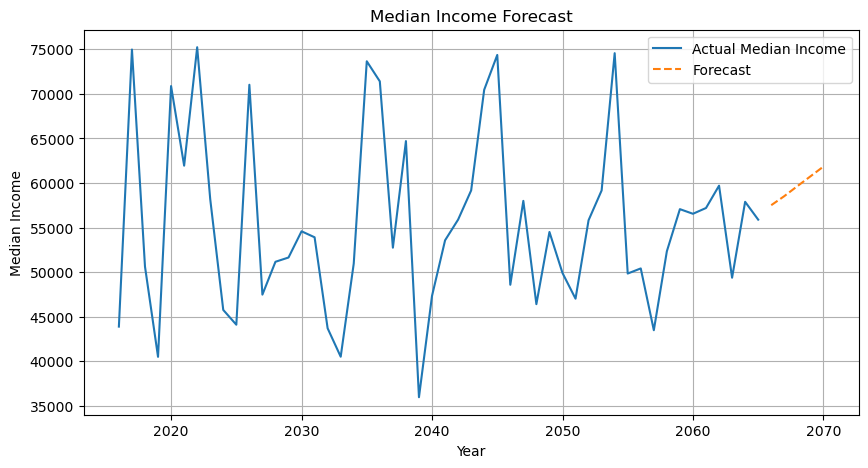

Forecasted Median Income (Next 5 Years):
2065-12-31    57511.347817
2066-12-31    58526.257358
2067-12-31    59642.874508
2068-12-31    60742.452984
2069-12-31    61844.885882
Freq: YE-DEC, Name: predicted_mean, dtype: float64


In [130]:

# Prepare data for time-series forecasting
time_series_data = merged_data.groupby('state_name')['median income'].mean()
time_series_data.index = pd.date_range(start='2015', periods=len(time_series_data), freq='Y')

# Fit ARIMA model
model = ARIMA(time_series_data, order=(1,2,1))
model_fit = model.fit()

# Forecast future values (next 5 years)
future_steps = 5
forecast = model_fit.forecast(steps=future_steps)

# Plot actual vs forecasted
plt.figure(figsize=(10, 5))
plt.plot(time_series_data, label="Actual Median Income")
plt.plot(pd.date_range(time_series_data.index[-1], periods=future_steps + 1, freq='Y')[1:], forecast, label="Forecast", linestyle='--')
plt.legend()
plt.title("Median Income Forecast")
plt.xlabel("Year")
plt.ylabel("Median Income")
plt.grid(True)
plt.show()

print("Forecasted Median Income (Next 5 Years):")
print(forecast)


# Step 5 Identify Economically Vulnerable Counties

In [131]:
# Create vulnerability index (higher values = more vulnerable)
merged_data['vulnerability_index'] = (
    merged_data['unemployment %'] * 0.4 +
    merged_data['% below poverty line'] * 0.3 +
    merged_data['rental vacany rate'] * 0.3
)

In [132]:
# Rank counties by vulnerability
vulnerability_ranking = merged_data[['state_name', 'County', 'vulnerability_index']].sort_values(by='vulnerability_index', ascending=False)

Top 10 Most Vulnerable Counties:
           County  vulnerability_index
5512    worcester                26.12
717       buffalo                24.97
8053       benton                24.54
6767      hancock                22.62
5975    jefferson                22.10
6718       greene                22.00
3369   washington                20.81
17522    franklin                20.30
10889     madison                20.09
8601       martin                19.52


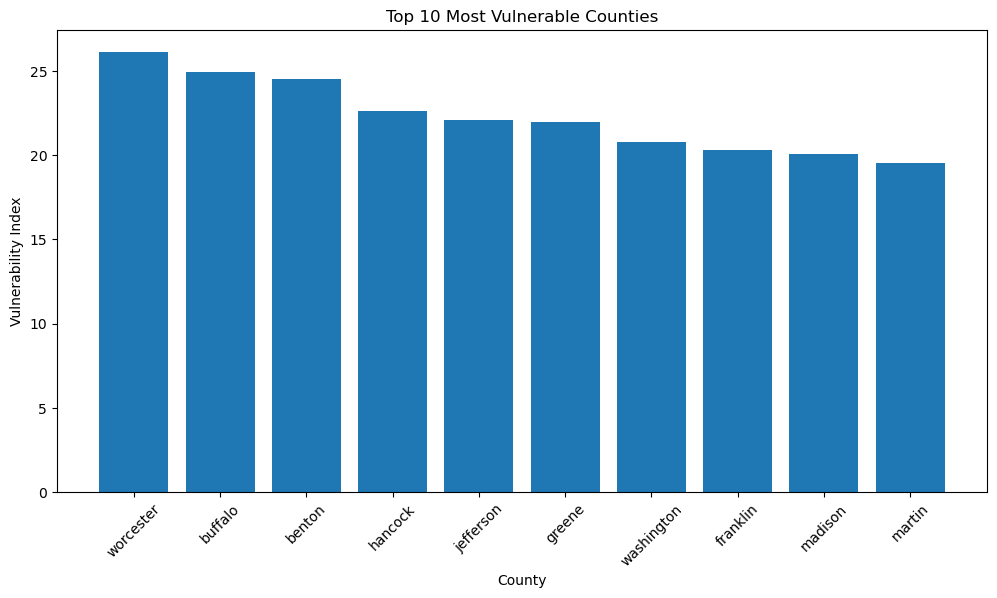

In [133]:
# Get top 10 unique counties based on vulnerability index
top_unique_counties = vulnerability_ranking.drop_duplicates(subset=['County']).nlargest(10, 'vulnerability_index')

# Print top 10 unique counties
print("Top 10 Most Vulnerable Counties:")
print(top_unique_counties[['County', 'vulnerability_index']])

# Visualize the most vulnerable counties
plt.figure(figsize=(12, 6))
plt.bar(top_unique_counties['County'], top_unique_counties['vulnerability_index'])
plt.title("Top 10 Most Vulnerable Counties")
plt.xlabel("County")
plt.ylabel("Vulnerability Index")
plt.xticks(rotation=45)
plt.show()

# Chart 9:- yearly_house_value

In [136]:
print("Raw 'median house value' sample:\n", census_data["median house value"].head(10))
print("Min value:", census_data["median house value"].min())
print("Max value:", census_data["median house value"].max())
print("Any negatives?", (census_data["median house value"] < 0).any())

Raw 'median house value' sample:
 3221     81300.0
3222     74900.0
3223    161400.0
3224     58500.0
3225    127800.0
3226     76700.0
3227    211000.0
3228     77700.0
3229     84300.0
3230    168700.0
Name: median house value, dtype: float64
Min value: -888888888.0
Max value: 1441300.0
Any negatives? True


In [137]:
census_data["median house value"] = pd.to_numeric(census_data["median house value"], errors='coerce')

In [138]:
cleaned_data = census_data[census_data["median house value"] >= 0].dropna(subset=["median house value"])

In [139]:
yearly_house_value = cleaned_data.groupby("Year")["median house value"].mean()

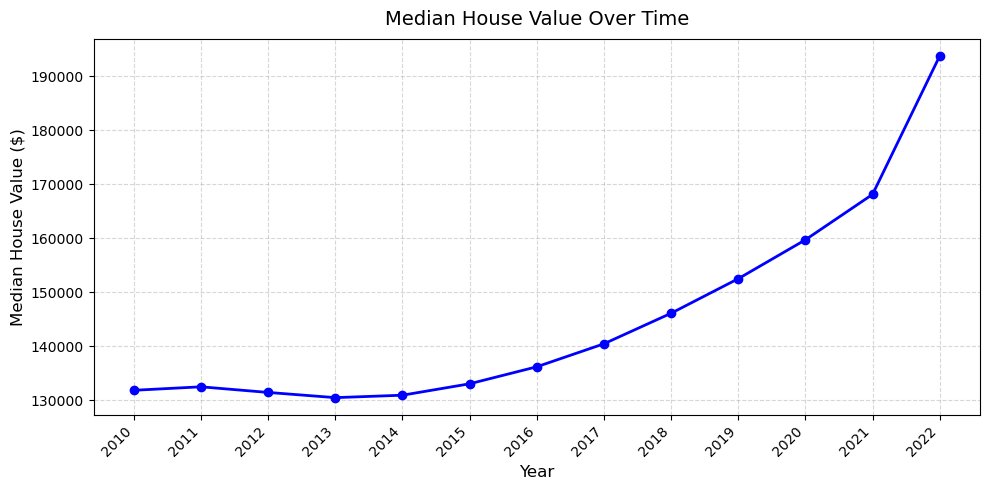

In [140]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_house_value.index, yearly_house_value.values, marker='o', linestyle='-', color='blue', linewidth=2)
plt.title("Median House Value Over Time", fontsize=14, pad=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median House Value ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(yearly_house_value.index, rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### The median house value remained relatively stable from 2010 to 2014, fluctuating around 130,000.
#### A gradual increase started in 2015, with prices rising steadily year after year.
#### From 2020 onwards, the growth rate accelerated significantly, surpassing 190,000 in 2022.
#### The sharpest price surge occurred between 2021 and 2022, indicating a strong housing market boom.

DONE

# Chart 10 : - Average Unemployment Rate Over the Years

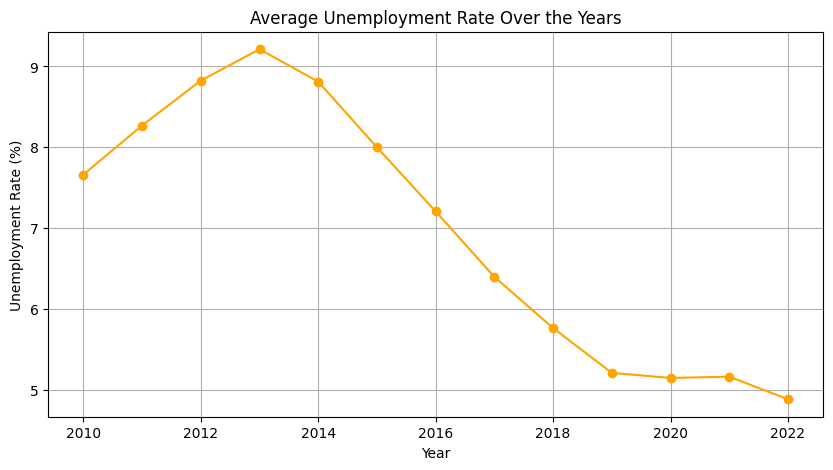

In [372]:
# Group by Year and calculate the average unemployment rate
unemployment_rate = merged_data.groupby("Year")["unemployment %"].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(unemployment_rate.index, unemployment_rate.values, marker='o', linestyle='-', color='orange')
plt.title("Average Unemployment Rate Over the Years")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()


## average unemployment rate from 2010 to 2022:

#### 2010-2013: A steady increase, peaking at around 9.2% in 2013.
#### 2014-2022: A consistent decline, reaching its lowest point at around 4.9% in 2022.

# Chart 11 : - Military Population Distribution Over the Years

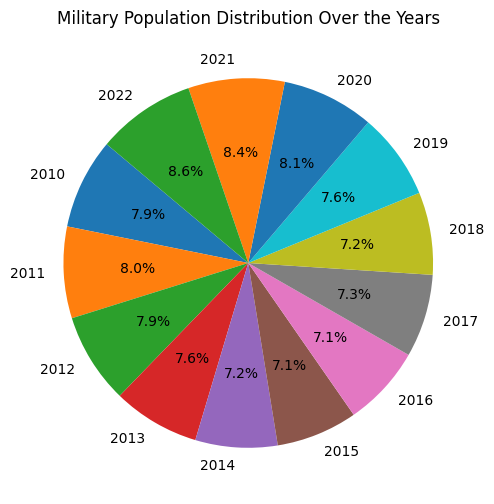

In [373]:
yearly_mil_pop = merged_data.groupby("Year")["mil pop"].sum()

# Plot Pie Chart
plt.figure(figsize=(10, 6))
plt.pie(yearly_mil_pop, labels=yearly_mil_pop.index, autopct='%1.1f%%', startangle=140)
plt.title("Military Population Distribution Over the Years")
plt.show()

## the distribution of the military population over the years.

#### The highest proportion of the military population is in 2022 (8.6%), followed by 2021 (8.4%).
#### There is a relatively balanced distribution across the years, with some fluctuations.
#### 2016-2018 had the lowest shares, around 7.1% - 7.3%, indicating a potential decrease in military personnel during those years